<a href="https://colab.research.google.com/github/ausfear/Python/blob/main/Machine%20Learning%20Projects/rock-paper-scissors/Klasifikasi_rockpaperscissors_Audinta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyek Akhir : Klasifikasi Gambar** 

Untuk memenuhi tugas akhir dari kelas/academy Dicoding, yaitu "Belajar Machine Learning untuk Pemula".

*oleh Audinta Sakti Firmansyah* (audintasf@gmail.com).
Kabupaten Tanah Bumbu, Kalimantan Selatan




---



Impor library-library yang diperlukan.

In [ ]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import berikut digunakan untuk upload gambar testing
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

Impor datasets dengan menggunakan !wget commands.

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2021-07-24 05:49:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.65MB/s    in 82s     

2021-07-24 05:50:24 (3.76 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Cek file.

In [ ]:
os.listdir('/tmp/')

['dap_multiplexer.e49e1ab3d9fe.root.log.INFO.20210723-221245.52',
 'dap_multiplexer.INFO',
 'tmp1mhfo_bc.py',
 '__pycache__',
 'tmpp829673t.py',
 'initgoogle_syslog_dir.0',
 'tmp1la1te5o.py',
 'rockpaperscissors',
 'tmpj79utyc2.py',
 'debugger_2rk34zrtwt',
 'rockpaperscissors.zip',
 'tmppz0muvgr.py',
 'tmps7h3wglb.py',
 'tmpxak7vjcc.py',
 'tmpbb49c942.py',
 '__MACOSX']

Ekstraksi (unzip) data.

In [ ]:
dataset_zip = '/tmp/rockpaperscissors.zip'
zip_ext = zipfile.ZipFile(dataset_zip, 'r')
zip_ext.extractall('/tmp')
zip_ext.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

os.listdir(base_dir)

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

Cek jumlah gambar masing-masing label (batu, kertas, gunting).

In [ ]:
label_folders = ['rock', 'paper', 'scissors']

for folder in label_folders:
  JumlahGambar = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/{}/'.format(folder)))
  print('Ada sebanyak {} gambar dalam folder {}.'.format(JumlahGambar, folder))

Ada sebanyak 726 gambar dalam folder rock.
Ada sebanyak 712 gambar dalam folder paper.
Ada sebanyak 750 gambar dalam folder scissors.


Didapat jumlah gambar yang sama seperti dengan yang ada di file README.

Gunakan parameter *validation_split* dari `ImageDataGenerator()` untuk membagi data training dan data validation.

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.15,
                    zoom_range=0.15,
                    horizontal_flip=True,
                    fill_mode = 'wrap',
                    validation_split=0.4
)

In [ ]:
train_gen = train_datagen.flow_from_directory(
    base_dir,
    #pada file README, author mengatakan bahwa dimensi sampelnya adalah 300x200 (hxw)
    #maka disini bisa digunakan 150x100 (hxw) agar tetap sebanding dengan sampel asli. 
    target_size=(100,150),
    shuffle=True,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Buat arsitektur CNN nya. Disini akan tetap menggunakan `models.Sequential` karena sudah ketentuan.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Tambahkan optimizer dan loss-function terhadap model.

Disini saya sudah mencoba menggunakan beberapa optimizer. Yang memberikan hasil paling baik adalah Adam(), kemudian SGD(). Menggunakan parameter default dari Adam sudah memberikan hasil yang cukup bagus.

In [ ]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
opt2 = tf.keras.optimizers.Adam()
opt3 = tf.keras.optimizers.RMSprop()

model.compile(loss='categorical_crossentropy',
              optimizer=opt2,
              metrics=['accuracy'])

Kemudian, latih model dengan `model.fit`. Saya menggunakan sebanyak 25 epoch, dengan 30 step tiap epoch-nya. Ini akan memakan waktu sekitar 15 menit (dengan runtime dari Google Colab). 

Pada saat dicoba, sebenarnya dari 10 epochs saja sudah didapat akurasi sekitar 0.94 keatas, dengan loss sekitar kurang dari 0.2. Saya memakai sampai 25 epochs karena hasil yang didapat bisa lebih optimal, yaitu akurasi hingga 0.99 dengan loss kurang dari 0.03.

In [ ]:
pelatihan = model.fit(
      train_gen,
      steps_per_epoch=30,  
      epochs=25, 
      validation_data=val_gen, 
      validation_steps=6,  
      verbose=2)

Epoch 1/25
30/30 - 38s - loss: 1.0615 - accuracy: 0.4634 - val_loss: 0.8401 - val_accuracy: 0.6042
Epoch 2/25
30/30 - 37s - loss: 0.5489 - accuracy: 0.7656 - val_loss: 0.3568 - val_accuracy: 0.8854
Epoch 3/25
30/30 - 36s - loss: 0.3050 - accuracy: 0.8871 - val_loss: 0.3988 - val_accuracy: 0.8125
Epoch 4/25
30/30 - 36s - loss: 0.3221 - accuracy: 0.8849 - val_loss: 0.2690 - val_accuracy: 0.9115
Epoch 5/25
30/30 - 37s - loss: 0.2209 - accuracy: 0.9240 - val_loss: 0.2039 - val_accuracy: 0.9167
Epoch 6/25
30/30 - 36s - loss: 0.1941 - accuracy: 0.9333 - val_loss: 0.1504 - val_accuracy: 0.9635
Epoch 7/25
30/30 - 36s - loss: 0.1566 - accuracy: 0.9387 - val_loss: 0.3979 - val_accuracy: 0.8385
Epoch 8/25
30/30 - 36s - loss: 0.1472 - accuracy: 0.9452 - val_loss: 0.1576 - val_accuracy: 0.9583
Epoch 9/25
30/30 - 36s - loss: 0.1325 - accuracy: 0.9495 - val_loss: 0.2059 - val_accuracy: 0.9479
Epoch 10/25
30/30 - 36s - loss: 0.1003 - accuracy: 0.9613 - val_loss: 0.1528 - val_accuracy: 0.9531
Epoch 11/

Buat grafik/plot dari hasil pelatihan.

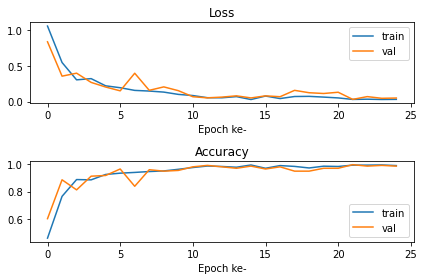

In [ ]:
#Plot Loss
plt.subplot(211)
plt.title('Loss')
plt.plot(pelatihan.history['loss'], label='train')
plt.plot(pelatihan.history['val_loss'], label='val')
plt.xlabel('Epoch ke-')
plt.legend()

#Plot Accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(pelatihan.history['accuracy'], label='train')
plt.plot(pelatihan.history['val_accuracy'], label='val')
plt.xlabel('Epoch ke-')
plt.legend()

plt.tight_layout() #Agar tidak tumpang tindih
plt.show()

Kode dibawah merupakan kode untuk mengetes model menggunakan masing-masing satu gambar acak dari ketiga folder yang ada dalam dataset. Jika model sudah akurat, seharusnya output kode berikut akan memberikan hasil rock - paper - scissors secara berurutan.

Gambar /tmp/rockpaperscissors/rps-cv-images/rock/oYZ5GJcd60BPi0BI.png (Dari folder rock)
Rock
Gambar /tmp/rockpaperscissors/rps-cv-images/paper/73UfZ8Dwj0OB66IV.png (Dari folder paper)
Paper
Gambar /tmp/rockpaperscissors/rps-cv-images/scissors/BwX4LCp8V8FlquK1.png (Dari folder scissors)
Scissors


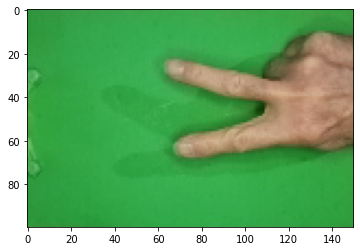

In [ ]:
label_folders = ['rock', 'paper', 'scissors']

for folder in label_folders:
  label_dir = os.listdir('/tmp/rockpaperscissors/rps-cv-images/{}/'.format(folder))
  JumlahGambar = len(label_dir)
  randNumber = random.randint(1, JumlahGambar)

  image_path = '/tmp/rockpaperscissors/rps-cv-images/{}/{}'.format(folder, label_dir[randNumber])
  img = image.load_img(image_path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  hasilprediksi = model.predict(images, batch_size=4)

  print('Gambar', image_path, '(Dari folder {})'.format(folder))
  if hasilprediksi[0][0]==1:
      print('Paper')
  elif hasilprediksi[0][1]==1:
      print('Rock')
  else:
      print('Scissors')


Kemudian, buat tempat untuk penguploadan foto sehingga bisa digunakan untuk mengecek gambar hasil uploadan kita.

Saving rock2.jpg to rock2 (1).jpg
Gambar rock2.jpg
Rock


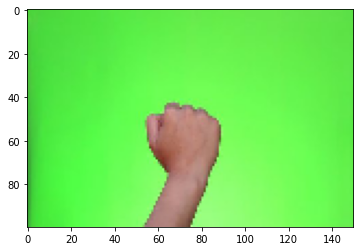

In [ ]:
from google.colab import files    #Entah kenapa jika import ini diletakkan diatas, kadang menghasilkan error
uploaded = files.upload()

for image_path in uploaded.keys():
  img = image.load_img(image_path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  hasilprediksi = model.predict(images, batch_size=4)

  print('Gambar', image_path,)
  if hasilprediksi[0][0]==1:
      print('Paper')
  elif hasilprediksi[0][1]==1:
      print('Rock')
  else:
      print('Scissors')

Karena gambar dalam dataset yang digunakan untuk model ini semuanya memiliki latar belakang hijau, maka model ini akan optimal jika foto yang dicek juga memiliki latar belakang hijau. Jika tidak, biasanya model akan cenderung menyatakan bahwa gambar tersebut Paper.